In [207]:

import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt # no need for seaborn but i include for savefig
plt.rcParams.update({'font.size':13})

df = sns.load_dataset('tips')  # need Internet

df.head()
df.tail()
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
38,18.69,2.31,Male,No,Sat,Dinner,3
16,10.33,1.67,Female,No,Sun,Dinner,3
106,20.49,4.06,Male,Yes,Sat,Dinner,2
184,40.55,3.00,Male,Yes,Sun,Dinner,2
191,19.81,4.19,Female,Yes,Thur,Lunch,2


In [208]:
# df.info()
# df.shape
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [209]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [210]:
df['size'] = df['size'].astype('category')
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size          category
dtype: object

In [211]:
df.describe()

,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


In [212]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

<Axes: >

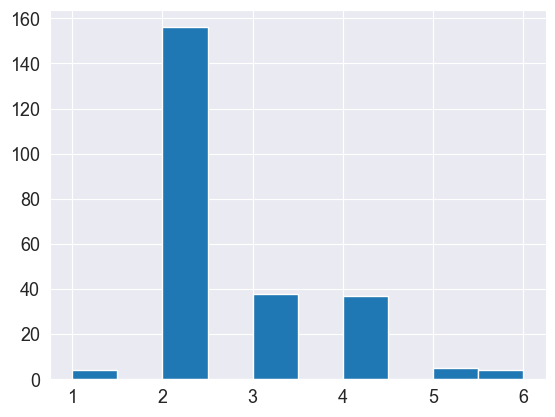

In [213]:
df['size'].hist()
#df.size.hist()

<Axes: xlabel='count', ylabel='size'>

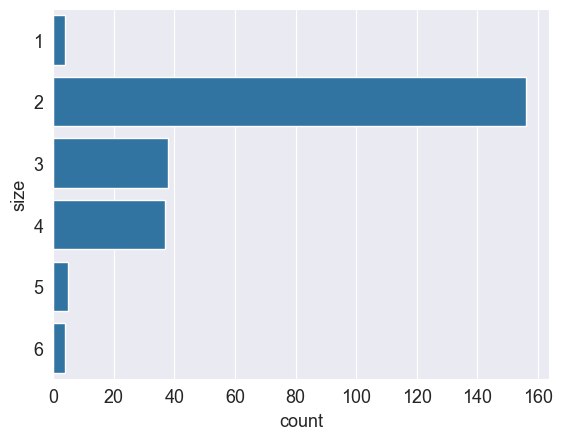

In [214]:
sns.countplot(df['size']) 
#sns.countplot('size', data=df)

In [215]:
df['size'].value_counts()  

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

In [216]:
pvt = df.pivot_table(index='size', values='total_bill', aggfunc='count')
# pvt.sort_values(by='total_bill', ascending=False)
pvt

# df['size'].value_counts().to_frame(name='freq')
# pd.DataFrame(df['size'].value_counts())

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\548806155.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index='size', values='total_bill', aggfunc='count')


,total_bill
size,
1,4
2,156
3,38
4,37
5,5
6,4


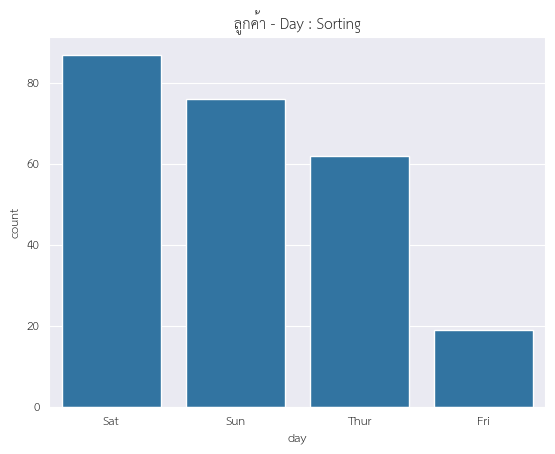

In [217]:
plt.rcParams['font.family'] = 'TH Sarabun New' #รองรับภาษาไทย
plt.title('ลูกค้า - Day : Sorting')
sns.countplot(x='day', data=df, order=['Sat','Sun','Thur','Fri']) 
plt.show()

In [218]:
# 
# pvt = df.pivot_table(index='size', columns='day', values='total_bill', aggfunc=['count'])
pvt = df.pivot_table(index='day', columns='size', values='total_bill', aggfunc=['count'])
# pvt.columns = pvt.columns.get_level_values(1)
pvt.columns = pvt.columns.droplevel() 
pvt
#pvt.T

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\1523479331.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index='day', columns='size', values='total_bill', aggfunc=['count'])


size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


<Axes: xlabel='day'>

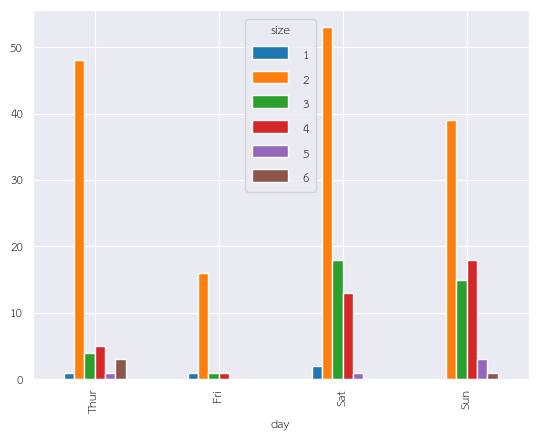

In [219]:
pvt.plot.bar()

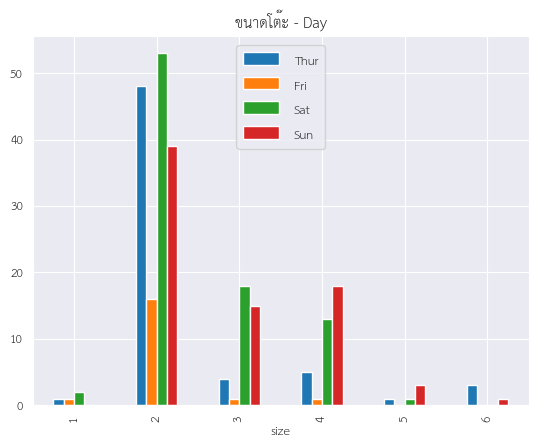

In [220]:
pvt.T.plot.bar()
plt.title('ขนาดโต๊ะ - Day')

plt.legend(loc='upper center')
plt.show()

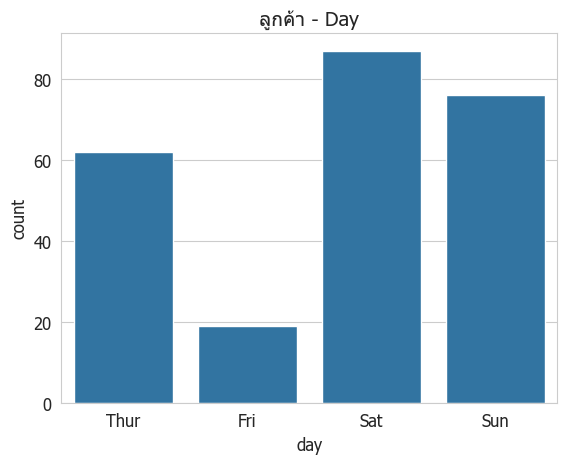

In [221]:
sns.set_style("whitegrid") 

plt.rcParams.update({'font.size':12, 'font.family':'tahoma'})
plt.title('ลูกค้า - Day')
sns.countplot(x='day', data=df) 
plt.show()

In [222]:
pvt = df.pivot_table(index='day', values='total_bill', aggfunc='count') # or len
pvt

df['day'].value_counts()
# df['day'].value_counts().to_frame(name='freq').sort_values('freq', ascending=False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\3249107796.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index='day', values='total_bill', aggfunc='count') # or len


day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

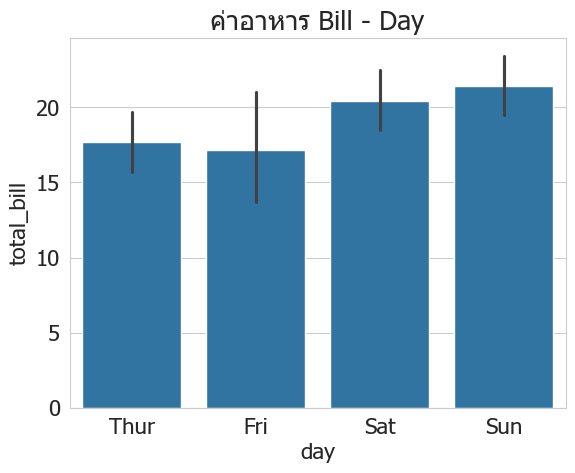

In [223]:
# bill - day
plt.rcParams.update({'font.size':16, 'font.family':'tahoma'})
plt.title('ค่าอาหาร Bill - Day')
sns.barplot(x='day',y='total_bill', data=df) # , kde=False

# plt.savefig('sns03-day-bill.png', dpi=120)
plt.show()

<Axes: title={'center': 'ค่าอาหาร Bill - Day'}, xlabel='day', ylabel='total_bill'>

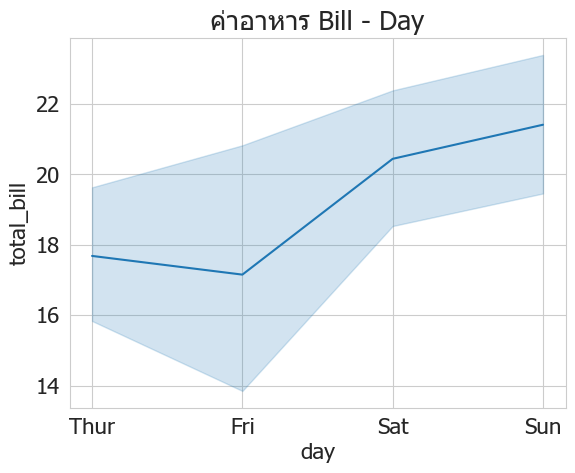

In [224]:
plt.title('ค่าอาหาร Bill - Day')
sns.lineplot(x='day',y='total_bill', data=df) 


In [225]:
pvt = df.pivot_table(index='day', values='total_bill', aggfunc=['mean','min','max','sum','std'])
pvt

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\1280882998.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index='day', values='total_bill', aggfunc=['mean','min','max','sum','std'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\1280882998.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index='day', values='total_bill', aggfunc=['mean','min','max','sum','std'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\1280882998.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain t

,mean,min,max,sum,std
,total_bill,total_bill,total_bill,total_bill,total_bill
day,,,,,
Thur,17.682742,7.51,43.11,1096.33,7.886170
Fri,17.151579,5.75,40.17,325.88,8.302660
Sat,20.441379,3.07,50.81,1778.40,9.480419
Sun,21.410000,7.25,48.17,1627.16,8.832122


In [226]:
df.groupby('day').total_bill.mean().sort_values(ascending=False) 
df.groupby('day').total_bill.min().sort_values(ascending=False) 
df.groupby('day').total_bill.sum().sort_values(ascending=False) 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\1074969539.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day').total_bill.mean().sort_values(ascending=False)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\1074969539.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day').total_bill.min().sort_values(ascending=False)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\1074969539.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the fu

day
Sat     1778.40
Sun     1627.16
Thur    1096.33
Fri      325.88
Name: total_bill, dtype: float64

In [227]:

df.groupby('day').total_bill.sum().sort_values(ascending=False).reset_index()  

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\3908872882.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day').total_bill.sum().sort_values(ascending=False).reset_index()


,day,total_bill
0,Sat,1778.40
1,Sun,1627.16
2,Thur,1096.33
3,Fri,325.88


In [228]:
group_data = df.groupby('day').total_bill.sum().reset_index()
#group_data = df.groupby('day').sum().sort_values('total_bill').reset_index()
group_data

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\3503123290.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data = df.groupby('day').total_bill.sum().reset_index()


,day,total_bill
0,Thur,1096.33
1,Fri,325.88
2,Sat,1778.40
3,Sun,1627.16


In [229]:
groupedval = df.groupby(['day','sex']).total_bill.sum().reset_index()
groupedval

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\7569929.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupedval = df.groupby(['day','sex']).total_bill.sum().reset_index()


,day,sex,total_bill
0,Thur,Male,561.44
1,Thur,Female,534.89
2,Fri,Male,198.57
3,Fri,Female,127.31
4,Sat,Male,1227.35
5,Sat,Female,551.05
6,Sun,Male,1269.46
7,Sun,Female,357.70


C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\2199901079.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index='day', values='total_bill', aggfunc=['sum'])


<Axes: xlabel='day'>

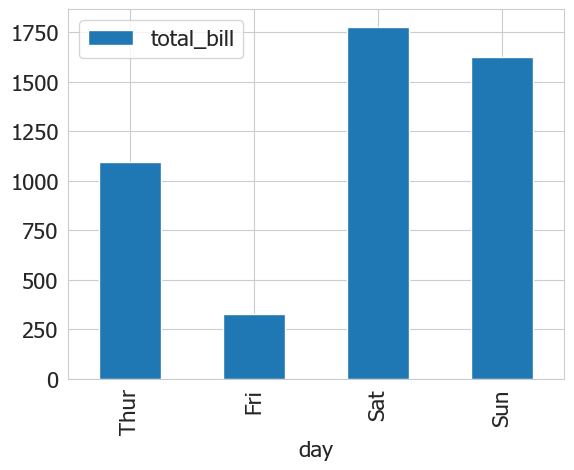

In [230]:
pvt = df.pivot_table(index='day', values='total_bill', aggfunc=['sum'])

# pvt.columns = pvt.columns.droplevel()  # drop 1 level ok
pvt.columns = pvt.columns.get_level_values(1)
# pvt
pvt.plot.bar()

<Axes: title={'center': 'ค่าอาหารรวม Bill - Day'}, xlabel='day', ylabel='total_bill'>

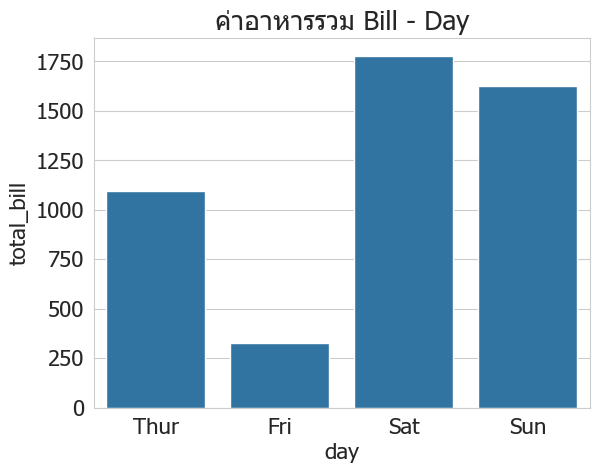

In [231]:
plt.title('ค่าอาหารรวม Bill - Day')
sns.barplot(x='day',y='total_bill',data=pvt)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\3394692920.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data = df.groupby('day').total_bill.sum().reset_index()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\3394692920.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day',y='total_bill',data=group_data, palette='Set2')


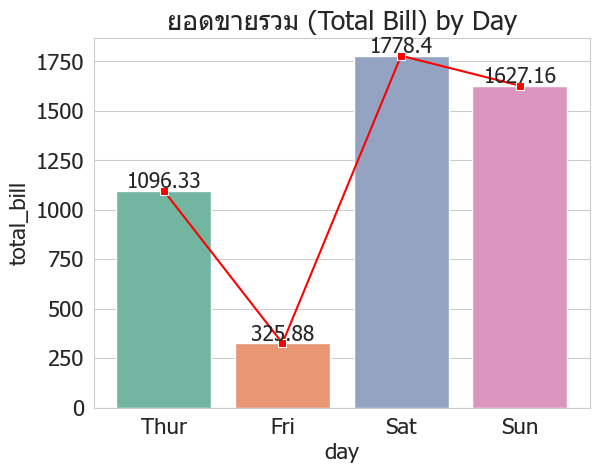

In [232]:
# annotate

group_data = df.groupby('day').total_bill.sum().reset_index()
sns.barplot(x='day',y='total_bill',data=group_data, palette='Set2')
sns.lineplot(x='day',y='total_bill',data=group_data, marker='s', color='r')

for index, row in group_data.iterrows():
    plt.annotate(round(row.total_bill, 2), 
                 (row.name, row.total_bill), 
                 textcoords="offset points", 
                 xytext=(0, 2), 
                 ha='center',
                 fontsize=15) 

plt.title('ยอดขายรวม (Total Bill) by Day')
plt.show()

In [233]:
pvt = df.pivot_table(index='sex', values='total_bill', aggfunc=['mean','min','max','sum','std'])
pvt

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\2565460871.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index='sex', values='total_bill', aggfunc=['mean','min','max','sum','std'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\2565460871.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index='sex', values='total_bill', aggfunc=['mean','min','max','sum','std'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\2565460871.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain t

,mean,min,max,sum,std
,total_bill,total_bill,total_bill,total_bill,total_bill
sex,,,,,
Male,20.744076,7.25,50.81,3256.82,9.246469
Female,18.056897,3.07,44.30,1570.95,8.009209


C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\984825390.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index='sex', values='total_bill', aggfunc=['sum'])


Text(0.5, 1.0, 'ค่าอาหารรวม Bill - Sex')

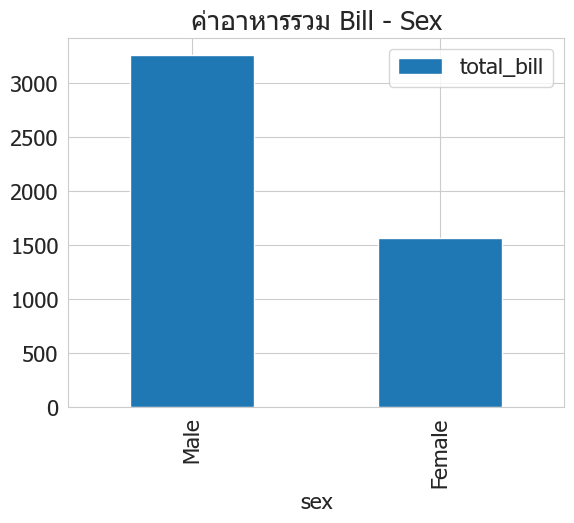

In [234]:
pvt = df.pivot_table(index='sex', values='total_bill', aggfunc=['sum'])
pvt.columns = pvt.columns.get_level_values(1)
pvt.plot.bar()
plt.title('ค่าอาหารรวม Bill - Sex')

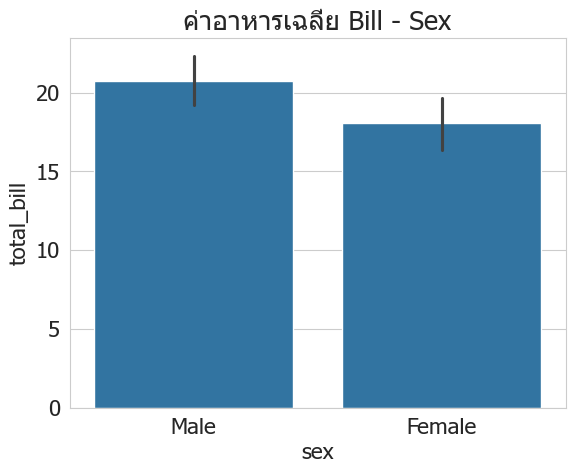

In [235]:
plt.title('ค่าอาหารเฉลี่ย Bill - Sex')
sns.barplot(x='sex',y='total_bill', data=df)
plt.show()

Text(0.5, 1.0, 'จำนวนลูกค้าแบ่งตาม Sex')

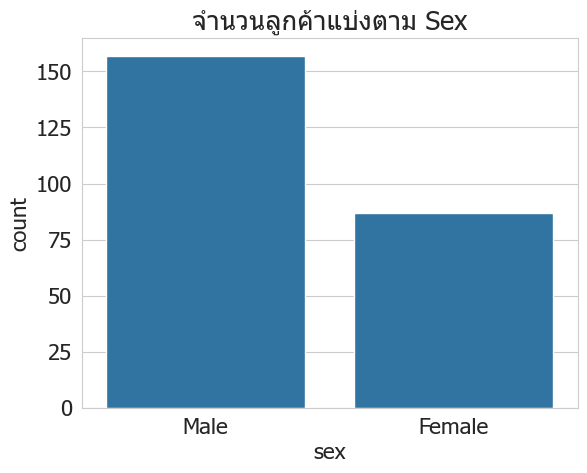

In [236]:
sns.countplot(x='sex',data=df)
plt.title('จำนวนลูกค้าแบ่งตาม Sex')


In [237]:
df.groupby('sex').total_bill.count()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\1114098146.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex').total_bill.count()


sex
Male      157
Female     87
Name: total_bill, dtype: int64

In [238]:
# smoker and non
# 
smk = df.groupby(['smoker']).total_bill.sum().reset_index()  
smk  # or
pvt = df.pivot_table(index='smoker', values='total_bill', aggfunc='sum').reset_index()
pvt

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\1033547634.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smk = df.groupby(['smoker']).total_bill.sum().reset_index()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\1033547634.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index='smoker', values='total_bill', aggfunc='sum').reset_index()


,smoker,total_bill
0,Yes,1930.34
1,No,2897.43


<Axes: xlabel='smoker', ylabel='total_bill'>

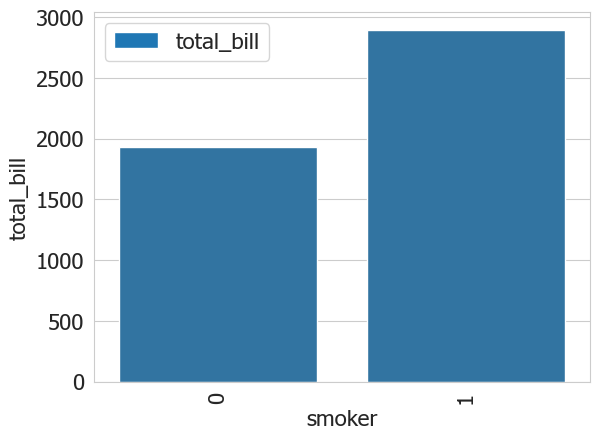

In [239]:
pvt.plot.bar()
sns.barplot(x='smoker',y='total_bill', data=pvt)

Text(0.5, 1.0, 'ยอดขาย zone ')

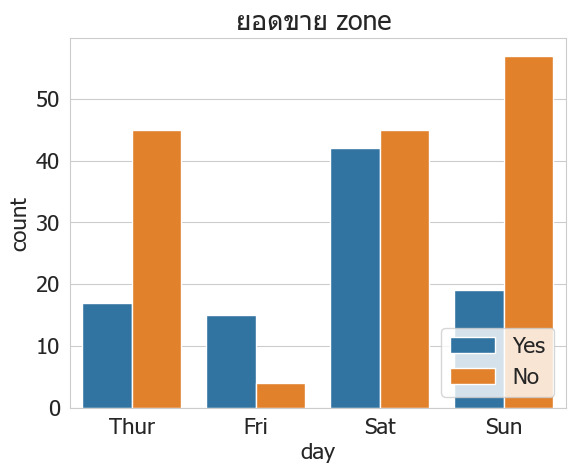

In [240]:
sns.countplot(x=df.day, hue=df.smoker)
plt.legend(loc='lower right')  # loc=best
plt.title('ยอดขาย zone ')

In [241]:
pvt = df.pivot_table(index='day', columns='smoker', values='total_bill', aggfunc='count')
pvt

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\1662998231.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index='day', columns='smoker', values='total_bill', aggfunc='count')


smoker,Yes,No
day,,
Thur,17,45
Fri,15,4
Sat,42,45
Sun,19,57


Text(0.5, 1.0, 'สรุป zone - day')

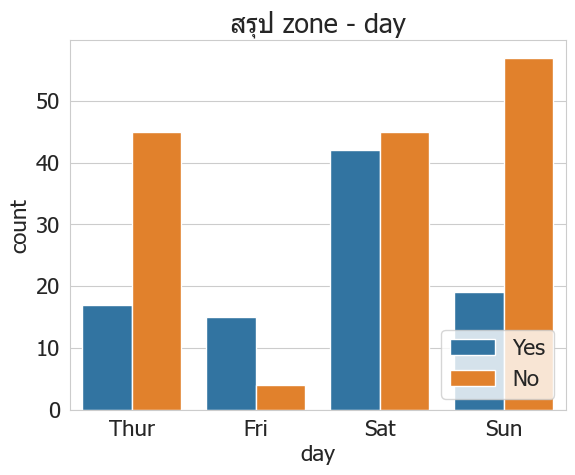

In [242]:
# sns.barplot(df.day, df.total_bill, hue=df.smoker)
sns.countplot(x=df.day, hue=df.smoker)
plt.legend(loc='lower right')  # loc=best
plt.title('สรุป zone - day')

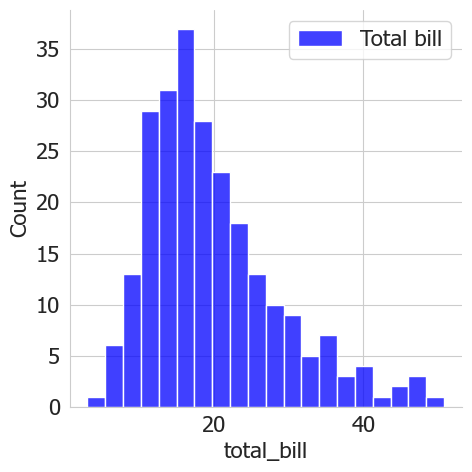

In [243]:
#sns.countplot(df.total_bill)# not good
sns.displot(df.total_bill, bins=20, label='Total bill', color='b') 
plt.legend()
# df.describe()

<Axes: >

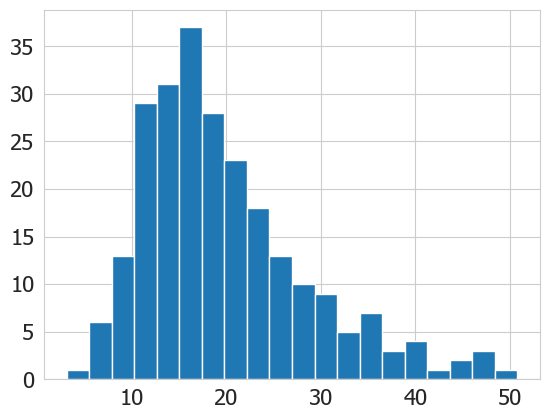

In [244]:
df.total_bill.hist(bins=20)
# df.hist('total_bill', bins=20)

<Axes: xlabel='total_bill', ylabel='Density'>

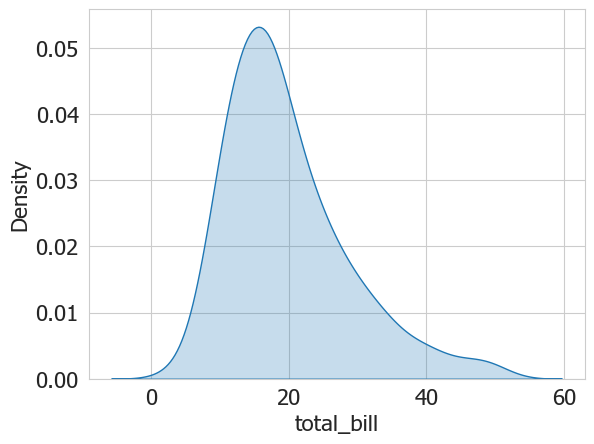

In [245]:
sns.kdeplot(df.total_bill, fill=True)


<Axes: ylabel='total_bill'>

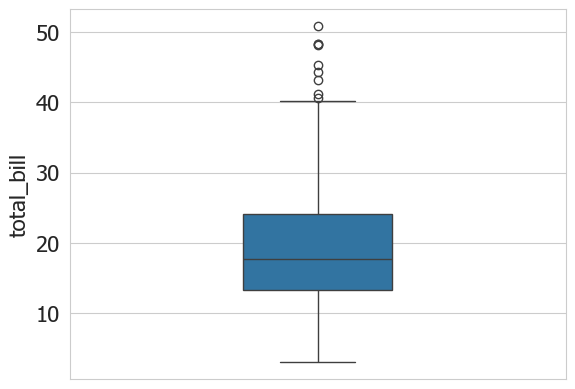

In [246]:
# sns.boxplot('total_bill', data=df)
# sns.boxplot(df.total_bill, width=0.5)
# plt.savefig('sns09-boxplot1x-bill.png',dpi=120)

# sns.boxplot(y='total_bill', data=df)
sns.boxplot(y='total_bill', data=df, width=0.3)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\1819107821.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.hist('total_bill', bins=10, by='time')


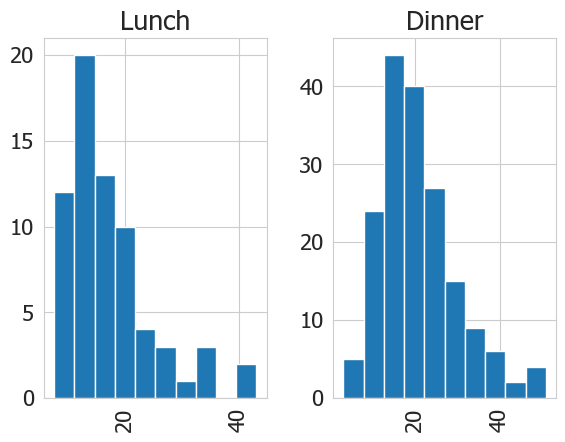

In [247]:
#ws13
df.hist('total_bill', bins=10, by='time')
plt.savefig('sns08-compare-bill-time.png',dpi=120)
plt.show()

In [248]:
pvt = df.pivot_table(index='time',values='total_bill') # mean
pvt

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\1020224960.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index='time',values='total_bill') # mean


,total_bill
time,
Lunch,17.168676
Dinner,20.797159


In [249]:
df.groupby('time').total_bill.mean().to_frame() \
       .sort_values('total_bill', ascending=False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\1074946247.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('time').total_bill.mean().to_frame() \


,total_bill
time,
Dinner,20.797159
Lunch,17.168676


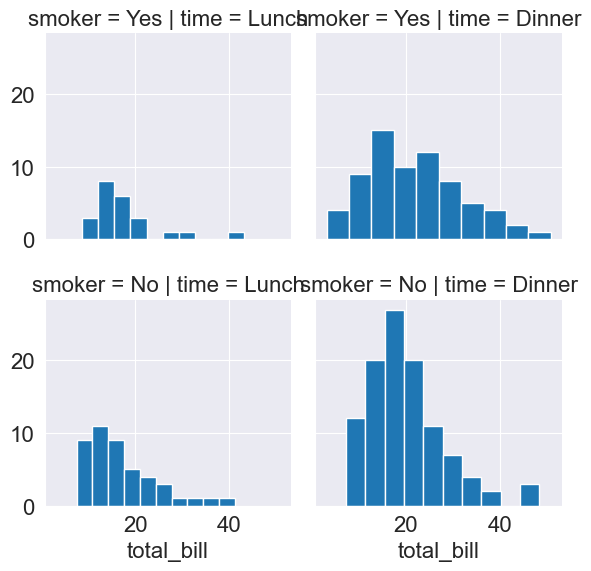

In [250]:
sns.set_style('darkgrid')

grid = sns.FacetGrid(df, row='smoker', col='time')

grid.map(plt.hist, 'total_bill', bins=10)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\2457549587.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='time',y='total_bill', data=df, width=0.4, palette='husl')


<Axes: xlabel='time', ylabel='total_bill'>

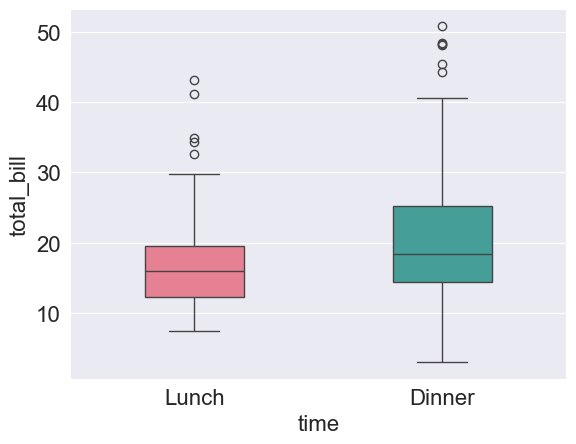

In [251]:
sns.boxplot(x='time',y='total_bill', data=df, width=0.4, palette='husl') 


<Axes: xlabel='time', ylabel='total_bill'>

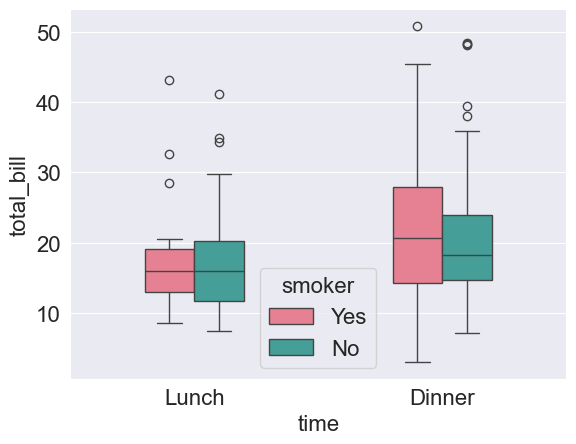

In [252]:

sns.boxplot(x=df.time, y=df.total_bill, hue=df.smoker, 
            width=0.4, palette='husl') 


In [253]:
df.groupby(['time']).total_bill.quantile([.25, .5, .75]).to_frame().T

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\1810705181.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['time']).total_bill.quantile([.25, .5, .75]).to_frame().T


time         Lunch                    Dinner                
              0.25    0.50     0.75     0.25   0.50     0.75
total_bill  12.235  15.965  19.5325  14.4375  18.39  25.2825

<Axes: xlabel='smoker', ylabel='total_bill'>

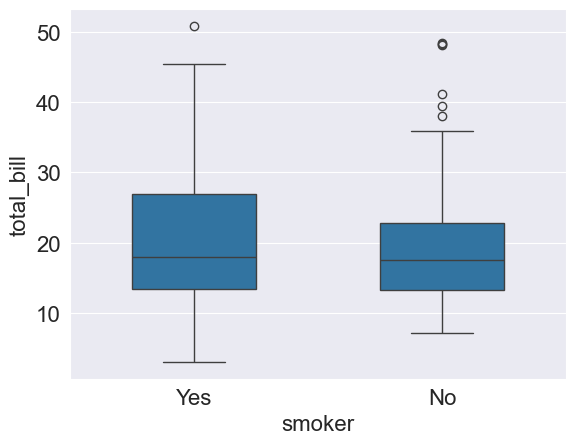

In [254]:

sns.boxplot(x=df.smoker, y=df.total_bill, width=0.5)


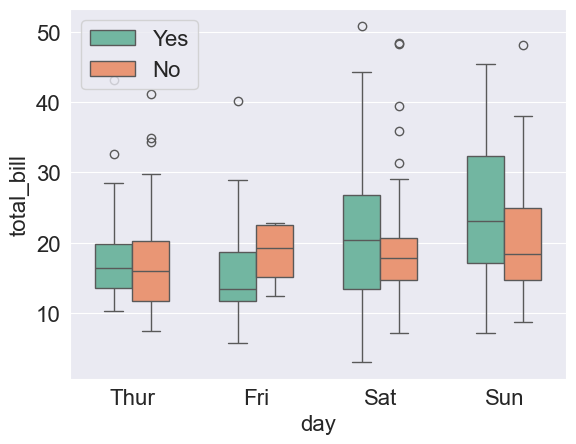

In [255]:

sns.boxplot(x=df['day'], y=df.total_bill, width=0.6, hue=df.smoker, palette='Set2') 

plt.legend(loc='upper left')


C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\1498592304.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index=['day'],columns='smoker', values='total_bill', aggfunc=['sum','count'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\1498592304.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index=['day'],columns='smoker', values='total_bill', aggfunc=['sum','count'])


sum          count    
smoker     Yes       No   Yes  No
day                              
Thur    326.24   770.09    17  45
Fri     252.20    73.68    15   4
Sat     893.62   884.78    42  45
Sun     458.28  1168.88    19  57

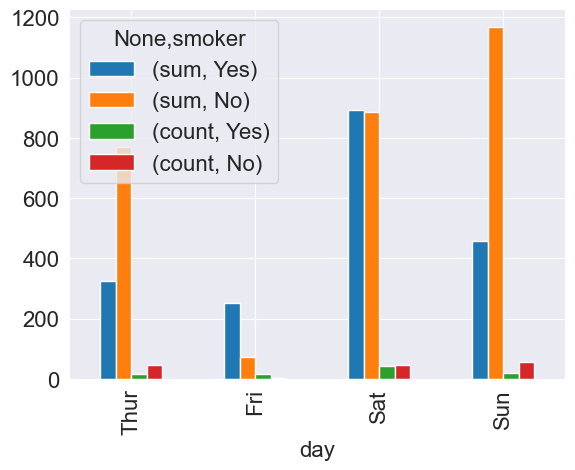

In [256]:
pvt = df.pivot_table(index=['day'],columns='smoker', values='total_bill', aggfunc=['sum','count']) 
pvt.plot.bar()
pvt

<Axes: xlabel='total_bill'>

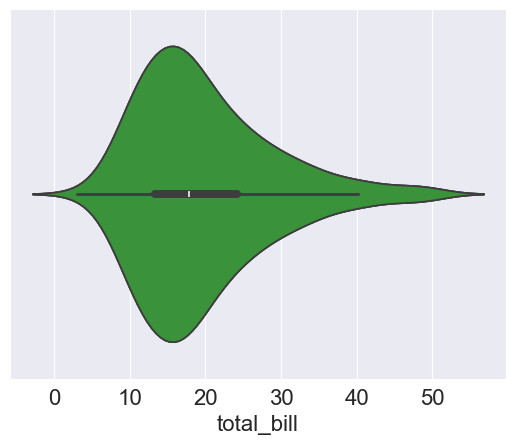

In [257]:
sns.violinplot(x=df.total_bill)
sns.violinplot(x=df['total_bill'])
sns.violinplot(x='total_bill', data=df)


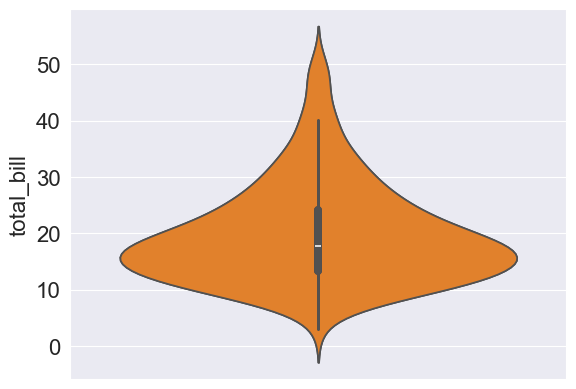

In [258]:
sns.violinplot(y=df.total_bill)
sns.violinplot(y='total_bill', data=df)
plt.show()

<Axes: xlabel='total_bill', ylabel='time'>

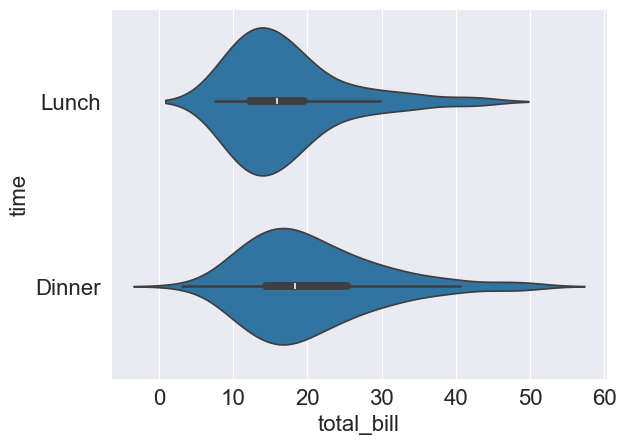

In [259]:
#sns.violinplot(x='time', y='total_bill', data=df) 

sns.violinplot(y='time', x='total_bill', data=df) 
#plt.savefig('sns12-violi-time-bill-h.png', dpi=120)

<Axes: xlabel='day', ylabel='total_bill'>

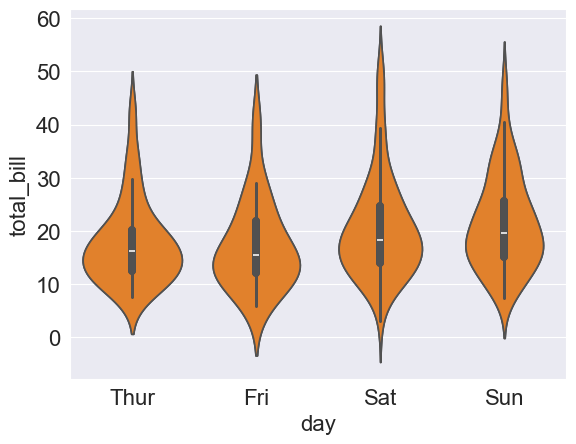

In [260]:

sns.violinplot(x='day',y='total_bill', data=df) 

ord = ['Fri','Thur','Sat','Sun']
sns.violinplot(x='day',y='total_bill', data=df, order=ord) 


<Axes: xlabel='day', ylabel='total_bill'>

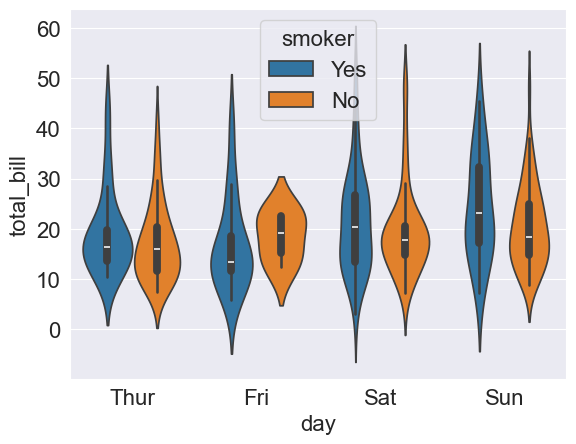

In [261]:

sns.violinplot(x='day',y='total_bill', data=df, hue='smoker')



<Axes: xlabel='day', ylabel='total_bill'>

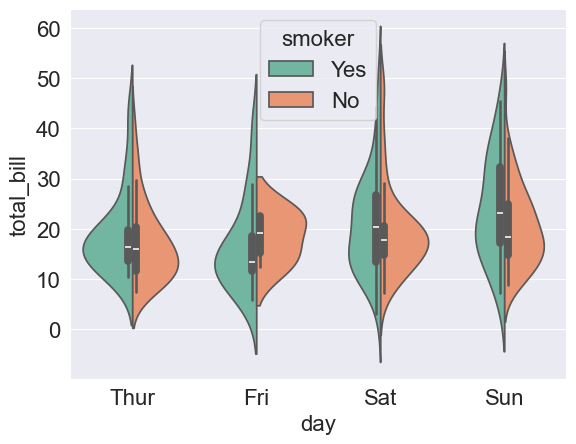

In [262]:
sns.violinplot(x='day', y='total_bill', data=df, hue='smoker', split=True, palette='Set2') 


<Axes: xlabel='sex', ylabel='total_bill'>

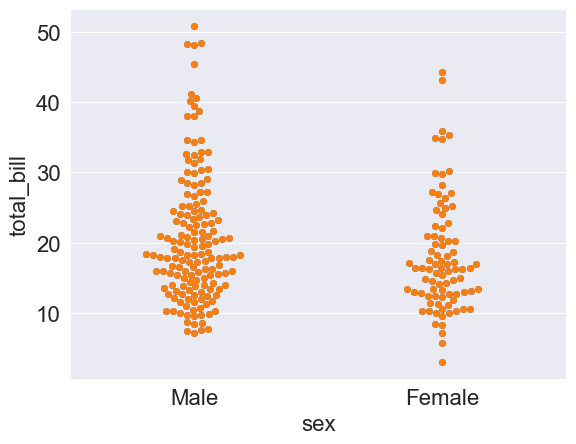

In [263]:

sns.swarmplot(x='sex',y='total_bill', data=df)
sns.swarmplot(x=df.sex,y=df.total_bill)


In [264]:
pvt = df.pivot_table(index='sex', values='total_bill')
pvt
df.groupby('sex').total_bill.mean().to_frame()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\3248651168.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index='sex', values='total_bill')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\3248651168.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex').total_bill.mean().to_frame()


,total_bill
sex,
Male,20.744076
Female,18.056897


<Axes: xlabel='day', ylabel='total_bill'>

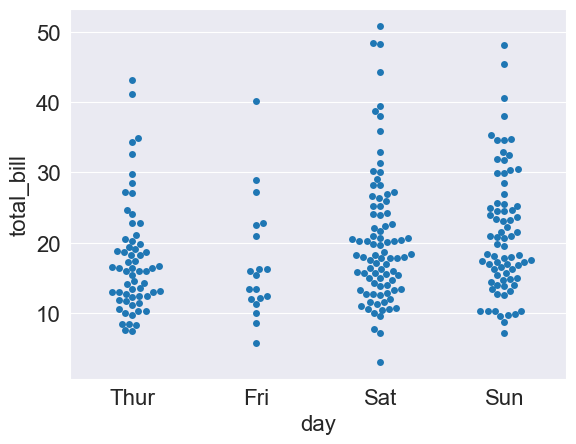

In [265]:
sns.swarmplot(x='day',y='total_bill', data=df)


In [269]:
pvt = df.pivot_table(index='day', values='total_bill')
pvt.sort_values('total_bill', ascending=False)
#df.groupby('day').total_bill.mean().to_frame().sort_values('total_bill', ascending=False)
#df.groupby('day').total_bill.mean()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28992\2009425349.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index='day', values='total_bill')


,total_bill
day,
Sun,21.410000
Sat,20.441379
Thur,17.682742
Fri,17.151579


In [271]:
# pvt.columns = pvt.columns.drop(labels=0)
pvt

,total_bill
day,
Thur,17.682742
Fri,17.151579
Sat,20.441379
Sun,21.410000
